<a href="https://colab.research.google.com/github/AraiKensuke/LOST/blob/Upgrade_python3/Notebooks/Ex11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#########  clone and install necessary packages from github repositories

import sys
import importlib

if importlib.util.find_spec("pyPG") is None:
  !git clone https://github.com/AraiKensuke/pyPG.git
  %cd /content/pyPG/
   ###  pyPG is written in C++/python, and uses the C library GNU Scientific Library.  
  !sudo apt-get install libgsl-dev    
  !python setup.py build_ext --inplace


!git clone https://github.com/AraiKensuke/ka_tools.git




Cloning into 'pyPG'...
remote: Enumerating objects: 90, done.
remote: Total 90 (delta 0), reused 0 (delta 0), pack-reused 90
Unpacking objects: 100% (90/90), done.
/content/pyPG
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgsl23 libgslcblas0
Suggested packages:
  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html
The following NEW packages will be installed:
  libgsl-dev libgsl23 libgslcblas0
0 upgraded, 3 newly installed, 0 to remove and 13 not upgraded.
Need to get 1,926 kB of archives.
After this operation, 9,474 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgslcblas0 amd64 2.4+dfsg-6 [79.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgsl23 amd64 2.4+dfsg-6 [823 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgsl-dev amd64 2.4+dfsg-6 [1,023 kB]
Fetched 1,926 kB in 2s 

In [2]:
if True:#importlib.util.find_spec("LOST") is None:
  %cd /content
  !git clone https://github.com/AraiKensuke/LOST.git
  %cd /content/LOST

!python setup.py build_ext --inplace

sys.path.insert(1, "/content/LOST")    #  add these to searchpath for python modules
sys.path.insert(1, "/content/pyPG")    #  add these to searchpath for python modules
%cd ..


#from google.colab import files
#uploaded = files.upload()

/content
Cloning into 'LOST'...
remote: Enumerating objects: 301, done.
remote: Counting objects: 100% (301/301), done.
remote: Compressing objects: 100% (231/231), done.
remote: Total 442 (delta 131), reused 209 (delta 66), pack-reused 141
Receiving objects: 100% (442/442), 25.90 MiB | 22.50 MiB/s, done.
Resolving deltas: 100% (202/202), done.
/content/LOST
running build_ext
cythoning kfARlibMPmv_ram2.pyx to kfARlibMPmv_ram2.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/LOST/kfARlibMPmv_ram2.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'kfARlibMPmv_ram2' extension
creating build
creating build/temp.linux-x86_64-3.6
/usr/local/bin/gcc-6 -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python

In [ ]:
"""
Template to invoke Latent Oscillation in Spike Train (LOST) model

There are 
"""

import numpy as _N
import os 
import LOST.mcmcARp_ram as _mARp
import ka_tools.filetools as _katft
import inspect

#########    
import LOST.exampledat.ex1 as exmp
spkdatfn="ex1"
basespkdatfn=spkdatfn
_katft.make_deep_directory("DATA/%s"  % basespkdatfn)
spkdatpath="DATA/%s/spk_dat.dat"  % basespkdatfn

_N.savetxt(spkdatpath, exmp.spk_dat, fmt="%d")

runlabel = 1
outdir="OUT/%(bsd)s%(rl)d" % {"bsd" : basespkdatfn, "rl" : runlabel}
_katft.make_deep_directory(outdir)
#########

myfn = inspect.getfile(inspect.currentframe())
os.system("cp %(myfn)s %(outdir)s/runLost.py" % {"myfn" : myfn, "outdir" : outdir})

###################  params and settings
bRealDat         = False      #  is our data real data <lfp> <fltrd> <spk 0 1>
pkldSmpls        = "smplsN.dump"   #  last Gibbs samples, pickled for continuation
postModes        = None       #  MAP estimate of parameters
dontrun          = False      #  just construct mARp from pickle

tr0 = 0
tr1 = 5
nwpr= "wp"
R   = 1
CnpCs = 3
__exec_base_fn__ = inspect.getfile(inspect.currentframe())[0:-3]
#nwpr, tr0, tr1, CnpCs, R = pF.parseFN(__exec_base_fn__)
Cn               = CnpCs - 1

mARp = _mARp.mcmcARp()
if nwpr == "wp":
    mARp.sig_ph0H =-(0.97*0.97)

mARp.mcmcRunDir = outdir
mARp.burn     = 1000
mARp.ITERS    = 10000
mARp.NMC      = 0
mARp.peek     = 200
mARp.model    = "bernoulli"
mARp.t0       = 0
mARp.t1       = 1500
mARp.ID_q2    = False
mARp.bpsth    = True
#mARp.dohist   = False
mARp.dt       = 0.001
mARp.histFN   = ""
mARp.ifs      = [(0.3 / mARp.fSigMax) * _N.pi]    #  initial values
mARp.Cn       = Cn
mARp.R        = R
mARp.knownSigFN= None
mARp.xknownSig=0.9
mARp.BsmpxSkp = 10
mARp.doBsmpx  = True
mARp.noAR     = False
mARp.processes= 1
mARp.downsamp = True

mARp.run(spkdatpath, outdir, trials=_N.arange(tr0, tr1), runlatent=False, dontrun=False,
          multiply_shape_hyperparam=1, multiply_scale_hyperparam=5, hist_timescale_ms=40, n_interior_knots=5)
    
#plotFsAmp(mARp, dir=__exec_base_fn__)
#mARp.dump_smps(mARp.burn, dir=outdir)



DATA
DATA/ex1
OUT
OUT/ex11
TR    20
[0 1 2 3 4]
!!!!!!!!!!!!!!!!!!!!!!   evry    2
[0, 1, 2, 3, 4]
(20, 750)
-2.427941715681653
setting prior for innovation 375  3.760e-01
*****************
35
749
*****************
upto   45
oo.N   749
maxisi 35
[ 0.  2.  4.  6. 11. 18. 27. 37. 45.]
0.047123889803846894
0.06283185307179587
[-0.4       +0.j          0.96999828+0.00182841j  0.96999828-0.00182841j
  0.51252953+0.02417028j  0.51252953-0.02417028j  0.37869108+0.02382522j
  0.37869108-0.02382522j]
R  [-0.40, ..]
C  [ 0.97,  0.001]
C  [ 0.51,  0.015]
C  [ 0.38,  0.020]
[ 78.87261841 163.81571448 337.57556314 518.55286699]
****!!!!!!!!!!!!!!!!  dohist  True
oo.mcmcRunDir    OUT/ex11
^^^^^^   allocateSmp  10000
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
[(-0.4+0j), (0.9699982767675818+0.00182840584165027j), (0.9699982767675818-0.00182840584165027j), (0.5125295323975964+0.024170279187225488j), (0.5125295323975964-0.024170279187225488j), (0.3786910811356244+0.02382522336157269j), (0.3786910811356244-0.023825

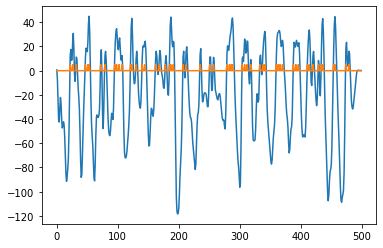

In [ ]:
import matplotlib.pyplot as _plt
_plt.plot(_N.mean(mARp.Bsmpx[0, 800:, 2:], axis=0))
_plt.plot(mARp.y[0]*5)

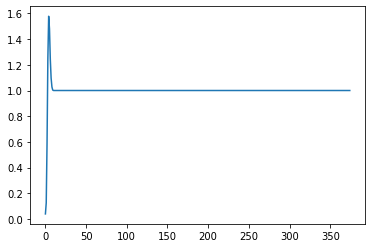

In [ ]:
_plt.plot(_N.exp(_N.mean(mARp.smp_hist[:, 28000:], axis=1)))


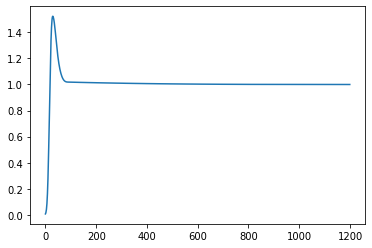

In [ ]:
_plt.plot(exmp.lmbd)

In [ ]:
mARp.smp_u

array([[-0.0490888 , -0.03458394,  0.07036439, ..., -3.38757111,
        -3.01804787, -2.64530902],
       [-0.09604988, -0.04170651, -0.22639758, ...,  1.8992428 ,
         2.30827616,  2.00892483],
       [ 0.08516395, -0.01753229, -0.08640559, ..., -3.2621454 ,
        -3.83217974, -3.81250919],
       [-0.04276482,  0.06210987,  0.28836939, ...,  3.93691352,
         3.65928247,  3.2345147 ],
       [ 0.10273954,  0.03171286, -0.04593061, ...,  0.81356018,
         0.88266897,  1.21437869]])